In [1]:
# Code source: https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827#:~:text=Save-,Stock%20Prices%20Prediction%20Using%20Long%20Short,Memory%20(LSTM)%20Model%20in%20Python&text=Long%20Short%2DTerm%20Memory%20(LSTM)%20is%20one%20type%20of,useful%20in%20predicting%20stock%20prices.

In [2]:
# 0. IMPORT PACKAGE
#pip install yfinance
#pip install pandas_ta

In [3]:
# 1. IMPORT LIBRARY

import math
import yfinance as yf
import numpy as np
import pandas as pd


from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import os
import random
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

In [5]:
# 2. IMPORT THE DATASET

AAPL_stock_data = yf.download('AAPL', start='2021-08-15', end='2022-08-15')
AAPL_stock_data.head()

AAPL_df = pd.DataFrame(AAPL_stock_data)
AAPL_df.to_csv("AAPLE_data.csv")


[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Prices ($)')

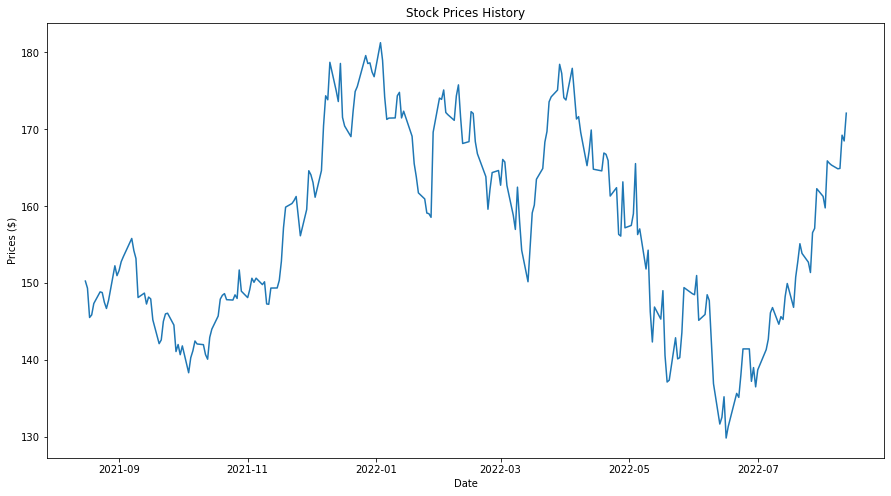

In [6]:
# 3. VISUALIZE THE DATA 

plt.figure(figsize=(15,8))
plt.title('Stock Prices History')
plt.plot(AAPL_stock_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [7]:
# Preparing training set

Adj_close_prices = AAPL_stock_data['Adj Close']
values = Adj_close_prices.values

# Training data 70% and Testing data 30%
training_data_len = math.ceil(len(values)*0.70)

In [8]:
# Preparing training set & Scaling 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

In [9]:
# Training 

x_train = []
y_train = []

# using last 10 days data as x

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0]) # Maybe we can try with different number instead of 10
    y_train.append(train_data[i, 0])
    
#Oswaldo's feedback
# Instruction uses 60 instead of 10
# 

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
x_train

array([[[0.39700605],
        [0.37900685],
        [0.30487984],
        ...,
        [0.34358845],
        [0.32771799],
        [0.34823377]],

       [[0.37900685],
        [0.30487984],
        [0.31146056],
        ...,
        [0.32771799],
        [0.34823377],
        [0.43571496]],

       [[0.30487984],
        [0.31146056],
        [0.34029854],
        ...,
        [0.34823377],
        [0.43571496],
        [0.41074779]],

       ...,

       [[0.81294589],
        [0.77316104],
        [0.68893382],
        ...,
        [0.72095599],
        [0.71765658],
        [0.70193697]],

       [[0.77316104],
        [0.68893382],
        [0.72600193],
        ...,
        [0.71765658],
        [0.70193697],
        [0.61208145]],

       [[0.68893382],
        [0.72600193],
        [0.7791772 ],
        ...,
        [0.70193697],
        [0.61208145],
        [0.63323544]]])

In [11]:
# Preparing test data

test_data = scaled_data[training_data_len-10: , : ]
x_test = []

y_test = values[training_data_len:]

for i in range(10, len(test_data)):
    x_test.append(test_data[i-10:i, 0])
print(x_test)  

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # the shape of the prediction might be different from this one

[array([0.72600193, 0.7791772 , 0.68000669, 0.67573734, 0.72095599,
       0.71765658, 0.70193697, 0.61208145, 0.63323544, 0.51523983]), array([0.7791772 , 0.68000669, 0.67573734, 0.72095599, 0.71765658,
       0.70193697, 0.61208145, 0.63323544, 0.51523983, 0.51077627]), array([0.68000669, 0.67573734, 0.72095599, 0.71765658, 0.70193697,
       0.61208145, 0.63323544, 0.51523983, 0.51077627, 0.64798482]), array([0.67573734, 0.72095599, 0.71765658, 0.70193697, 0.61208145,
       0.63323544, 0.51523983, 0.51077627, 0.64798482, 0.53173573]), array([0.72095599, 0.71765658, 0.70193697, 0.61208145, 0.63323544,
       0.51523983, 0.51077627, 0.64798482, 0.53173573, 0.5377522 ]), array([0.71765658, 0.70193697, 0.61208145, 0.63323544, 0.51523983,
       0.51077627, 0.64798482, 0.53173573, 0.5377522 , 0.56725095]), array([0.70193697, 0.61208145, 0.63323544, 0.51523983, 0.51077627,
       0.64798482, 0.53173573, 0.5377522 , 0.56725095, 0.69417399]), array([0.61208145, 0.63323544, 0.51523983, 0.51

In [12]:
x_test

array([[[0.72600193],
        [0.7791772 ],
        [0.68000669],
        [0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983]],

       [[0.7791772 ],
        [0.68000669],
        [0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983],
        [0.51077627]],

       [[0.68000669],
        [0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983],
        [0.51077627],
        [0.64798482]],

       [[0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983],
        [0.51077627],
        [0.64798482],
        [0.53173573]],

       [[0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
  

In [13]:
# Setting up LSTM Network Architecture

import time
start_time=time.time()

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1))) # 100 = network units
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25)) #add a densely connected neural network layer with 25 network units
model.add(layers.Dense(1))


print("---%s seconds to predict---"% (time.time()-start_time))
model.summary()

# We can improve the model by changing the layers number

---0.8601040840148926 seconds to predict---
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


# Training LSTM Model
# Optimizing the number of epochs

R2_score = []
for i in range(1,20):
    print("------------------------")
    
    print(f'The number of epoch is {i}')
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=i)
    
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predictions), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predictions), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predictions), 4))
    print("                            ")
    R2_score.append(round(metrics.r2_score(y_test, predictions), 4))

# Adam optimizer finds the place where the loss of function is minimum
# Neural network
# minimizes the loss of function


plt.title("R2 Score by the number of epochs")
x_axis = np.array(range(1,20))
plt.plot(x_axis, R2_score, marker = "o", )
plt.xticks(np.arange(0,20,1))



In [14]:
# The model's fit is the highest when the number of epochs is 7

In [15]:
x_test

array([[[0.72600193],
        [0.7791772 ],
        [0.68000669],
        [0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983]],

       [[0.7791772 ],
        [0.68000669],
        [0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983],
        [0.51077627]],

       [[0.68000669],
        [0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983],
        [0.51077627],
        [0.64798482]],

       [[0.67573734],
        [0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
        [0.51523983],
        [0.51077627],
        [0.64798482],
        [0.53173573]],

       [[0.72095599],
        [0.71765658],
        [0.70193697],
        [0.61208145],
        [0.63323544],
  

In [16]:
# Measureing the time

import time
start_time=time.time()

# Training the code
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)

predictions = model.predict(x_test)
print(predictions)
predictions = scaler.inverse_transform(predictions)

print("---%s seconds to predict---"% (time.time()-start_time))




Epoch 1/10
166/166 [==============================] - 4s 6ms/step - loss: 0.0209
Epoch 2/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0125
Epoch 3/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0100
Epoch 4/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 5/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 6/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0061
Epoch 7/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 8/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 9/10
166/166 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 10/10
3/3 [==============================] - 1s 7ms/step
[[0.53115785]
 [0.52498   ]
 [0.6371772 ]
 [0.5444367 ]
 [0.54342324]
 [0.5651181 ]
 [0.67225903]
 [0.52221775]
 [0.5286969 ]
 [0.44793636]
 [0.48050368]
 [0.3649444 ]
 [0.29348543]
 [0.344043  ]
 [0.33152863

In [77]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predictions), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predictions), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predictions), 4))

Mean Absolute Error: 2.9072
Mean Squared Error: 13.9841
Root Mean Squared Error: 3.7395
(R^2) Score: 0.8654


C:\Users\Microsoft\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


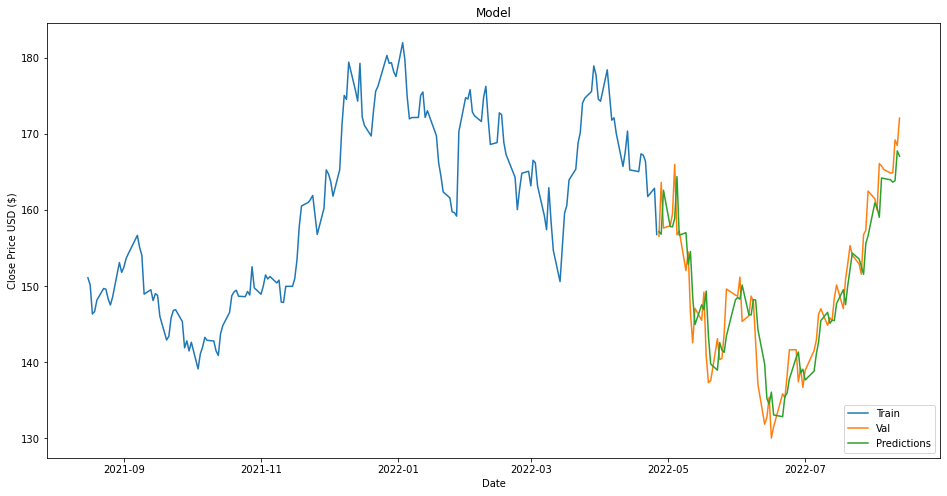

In [17]:
# Visualizing the predicted prices

data = AAPL_stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
scaled_data

array([[0.39700605],
       [0.37900685],
       [0.30487984],
       [0.31146056],
       [0.34029854],
       [0.36971681],
       [0.36797504],
       [0.34358845],
       [0.32771799],
       [0.34823377],
       [0.43571496],
       [0.41074779],
       [0.42390863],
       [0.44597256],
       [0.45855281],
       [0.50480999],
       [0.47422965],
       [0.45410142],
       [0.35539508],
       [0.36662053],
       [0.33894343],
       [0.35655597],
       [0.35191094],
       [0.29907394],
       [0.23868866],
       [0.24817173],
       [0.2950098 ],
       [0.31397685],
       [0.31571862],
       [0.28571946],
       [0.21875376],
       [0.23655992],
       [0.21081853],
       [0.23307578],
       [0.16514253],
       [0.20326996],
       [0.22049583],
       [0.24546241],
       [0.23791444],
       [0.23617237],
       [0.21101186],
       [0.19939945],
       [0.25455882],
       [0.27546157],
       [0.30855731],
       [0.35133035],
       [0.36100736],
       [0.365

In [19]:
# APPLYING THE MODEL TO THE WHOLE DATE

last_10days = []

for i in range(10, len(scaled_data)):
    last_10days.append(scaled_data[i-10:i, 0])

last_10days = np.array(last_10days)
last_10days = np.reshape(last_10days, (last_10days.shape[0], last_10days.shape[1], 1))



In [20]:
prediction_LSTM = model.predict(last_10days) 
prediction_LSTM = scaler.inverse_transform(prediction_LSTM)



8/8 [==============================] - 0s 7ms/step


In [21]:
data.head(10)

,Close
Date,
2021-08-16,151.119995
2021-08-17,150.190002
2021-08-18,146.360001
2021-08-19,146.699997
2021-08-20,148.190002
2021-08-23,149.710007
2021-08-24,149.619995
2021-08-25,148.360001
2021-08-26,147.539993


In [22]:
df_reset_index = data.reset_index()

In [23]:
data_historical_prediction = df_reset_index.drop([0,1,2,3,4,5,6,7,8,9])

In [24]:
data_historical_prediction = data_historical_prediction.set_index('Date')


In [25]:
data_historical_prediction['LSTM_prediction'] = prediction_LSTM
data_historical_prediction_for_csv = data_historical_prediction.drop('Close', axis=1)



In [26]:
# CSV File of the historical prediction data (August 2021 - August 2022)

In [27]:
data_historical_prediction_for_csv.to_csv("LSTM.csv")

In [28]:
data_historical_prediction

,Close,LSTM_prediction
Date,,
2021-08-30,153.119995,148.033371
2021-08-31,151.830002,151.552322
2021-09-01,152.509995,151.137436
2021-09-02,153.649994,151.545364
2021-09-03,154.300003,152.489975
...,...,...
2022-08-08,164.869995,163.991959
2022-08-09,164.919998,163.677551
2022-08-10,169.240005,163.880798



# TO MAKE A PREDICTION FROM AUGUST 15TH TO SEPTEMBER 15TH
# ABOVE I MADE A DATAFRAME WITH FUTURE DATE

## WHAT I'M TRYING TO DO
# Make a loop : using the last 10 days data to predict August 16th data
# Loop: then using the last 9 days and 1 predicted amount to predict August 17th data
# then make columns of upper&down confidence interval of the result


# Note
# Trying to predict for Last 24 business days 

values = data_historical_prediction['Close'].values
days_to_predict = 24 # days


#print(scaled_real_data_plus_prediction[-10:])
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

for day in range(days_to_predict):
    
    
    # for (another loop)
    for i in range(10, len(values)):
        .append(test_data[i-10:i, 0])
        
    # Get the last 10 days
    buffer = scaled_real_data_plus_prediction[-10:]
        
    #1
    scaled_real_data = scaler.fit_transform(values.reshape(-1,1))
    #print(f'(1): {scaled_real_data}')
    #2
    scaled_real_data = np.array(scaled_real_data)
    #print(f'(2): {scaled_real_data}')
    #3
    scaled_real_data = np.reshape(scaled_real_data, (scaled_real_data.shape[0],scaled_real_data.shape[1], 1))
    #print(f'(3): {scaled_real_data}')
    #4
    scaled_real_data_plus_prediction = scaled_real_data    

    # Get prediction
    prediction = model.predict(buffer)
    
    # Append the prediction to real data
    scaled_real_data_plus_prediction.append(prediction)
    # Repeate process
# scale back the predictions
#real_data_plus_prediction = unscale(scaled_real_data_plus_prediction)

#real_data_plus_prediction



In [89]:

values = data_historical_prediction['Close'].values
scaled_data = scaler.fit_transform(values.reshape(-1,1))
#print(scaled_data)

# length of values 241
days_to_predict = 24 # days



# Make a loop ( x 24) where 

for day in range(days_to_predict):
    ten_days_data =[]

    #for day in range(days_to_predict):
    ## 1. Make an array of 10 historical values of "Real data"
    ten_days_data.append(scaled_data[len(scaled_data)-10:len(scaled_data),0])
    #for i in range(len(scaled_data)-10, len(scaled_data)):
        #ten_days_data.append([scaled_data[i,0]])

    #print(ten_days_data)

    ## 2. Standardize and reshape the array

    ten_days_data = np.array(ten_days_data)
    #print(ten_days_data)
    ten_days_data = np.reshape(ten_days_data, (ten_days_data.shape[0], ten_days_data.shape[1], 1))
    #ten_days_data = np.array(ten_days_data)

    ## 3. Apply the model to the array to get a prediction value 
    prediction = model.predict(ten_days_data)
    #print(f'PREDICTION {prediction}')
    #print(prediction[0])
    #print(f'scaled back prediction {scaler.inverse_transform(predictions)}')


    ## 4. Add a prediction (reshaped, scaled) to scaled_data
    print(scaled_data.shape)
    #print(f'before {len(scaled_data)}')


    reshaped_prediction = np.reshape(prediction[0], (1,1))
    scaled_data_1 = np.reshape(scaled_data, (1,len(scaled_data)))
    scaled_data_2 = np.append(scaled_data_1, reshaped_prediction, axis=1)
    scaled_data_3 = np.reshape(scaled_data_2, (len(scaled_data)+1,1))
    scaled_data = scaled_data_3
    
    scale_back_predictions = scaler.inverse_transform(scaled_data)

#numpy.append(array, values, axis = None)

#scaled_data.append(prediction[0],axis=0)
#print(f'before {len(scaled_data)}')



1/1 [==============================] - 0s 68ms/step
(241, 1)
1/1 [==============================] - 0s 50ms/step
(242, 1)
1/1 [==============================] - 0s 43ms/step
(243, 1)
1/1 [==============================] - 0s 47ms/step
(244, 1)
1/1 [==============================] - 0s 45ms/step
(245, 1)
1/1 [==============================] - 0s 93ms/step
(246, 1)
1/1 [==============================] - 0s 96ms/step
(247, 1)
1/1 [==============================] - 0s 98ms/step
(248, 1)
1/1 [==============================] - 0s 71ms/step
(249, 1)
1/1 [==============================] - 0s 70ms/step
(250, 1)
1/1 [==============================] - 0s 64ms/step
(251, 1)
1/1 [==============================] - 0s 72ms/step
(252, 1)
1/1 [==============================] - 0s 74ms/step
(253, 1)
1/1 [==============================] - 0s 75ms/step
(254, 1)
1/1 [==============================] - 0s 36ms/step
(255, 1)
1/1 [==============================] - 0s 45ms/step
(256, 1)
1/1 [===================

In [90]:
# Extract the predicted value of Aug 12th - Sep 15th 

#len(scale_back_predictions)
future_prediction = scale_back_predictions[241:265]
future_prediction_df = pd.DataFrame(future_prediction, columns=['Prediction'])

#len(future_prediction)
#print(future_prediction_df)
future_prediction = future_prediction_df[['Prediction']]

In [94]:
#Making date data (August 15 - Sep 15)
new_period = pd.date_range(
    start= '2022/8/15',
    freq = 'd', 
    periods = 32)

# Deleting weekend
period_weekdays = []
for i in new_period:
    if i.weekday() <= 4:
        period_weekdays.append(i)
future_df = pd.DataFrame(period_weekdays)
future_df = future_df.set_index(0)
future_df.index.name = "Date"



In [96]:
future_df

""
Date
2022-08-15
2022-08-16
2022-08-17
2022-08-18
2022-08-19
2022-08-22
2022-08-23
2022-08-24
2022-08-25


In [97]:
frame = {'Date': df}

KeyError: 'Date'

In [88]:
future_df

""
170.419281
168.727985
167.378448
166.329125
165.564751
165.026088
164.641944
164.346808
164.061156
163.772551


In [54]:
#future_df['Prediction'] = future_prediction['Prediction']

,Prediction
2022-08-15,NaN
2022-08-16,NaN
2022-08-17,NaN
2022-08-18,NaN
2022-08-19,NaN
2022-08-22,NaN
2022-08-23,NaN
2022-08-24,NaN
2022-08-25,NaN
2022-08-26,NaN
